In [6]:
import pandas as pd
import numpy as np

# CCTY 서울 현황

In [9]:
CCTV_Seoul = pd.read_excel("../Data/CCTV_in_Seoul_2018.xlsx")

In [10]:
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [11]:
CCTV_Seoul.tail()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [13]:
# CCTV_Seoul의 컬럼명 확인
CCTV_Seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [14]:
CCTV_Seoul.columns[0]

'기관명'

In [15]:
# 컬럼이름 변경 : 기관명 -> 구별 
# Dictionary
# inplace = True 데이터 값 바로 적용하는 명령어 
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : "구별"}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [16]:
# NaN 데이터의 위치 및 내용 확인 -> 변경 시켜줘야함 
# 2011 이전 data만 봣을때는 NaN data 2개 있음 
CCTV_Seoul[CCTV_Seoul['2011년 이전'].isnull()]

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
10,동대문구,2003,NaN,NaN,NaN,1326,111,233,136,197
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [17]:
# 갯수 파악 
len(CCTV_Seoul[CCTV_Seoul['2011년 이전'].isnull()])

2

In [18]:
# NaN 데이터를 0으로 변환하기
# CCTV_Seoul.fillna(0) NaN data를 0 으로 채워라
CCTV_Seoul = CCTV_Seoul.fillna(0)
CCTV_Seoul.tail()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9


# 인구 현황 

In [20]:
pop_Seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx")
pop_Seoul.head()

,report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,기간,자치구,세대,인구,인구,인구,인구,인구,인구,인구,인구,인구,세대당인구,65세이상고령자
1,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
2,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
3,2020.1/4,합계,4354006,10013781,4874995,5138786,9733655,4742217,4991438,280126,132778,147348,2.24,1518239
4,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073


In [21]:
# header=3 -> 0,1,2 3칸은 안 쓰겠다는 의미 
# usecols ="B,D,G,J,N" -> 내가 필요한 부분만 쓰겠다.
# excel 순서 다 A, B, C, D, E... 순서라 
pop_Seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx",
                         header=3,
                         usecols="B,D,G,J,N"
                         )
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [23]:
# 컬럼 이름 변경
pop_Seoul.rename(columns={pop_Seoul.columns[0]:"구별",
                          pop_Seoul.columns[1]:"인구수",
                          pop_Seoul.columns[2]:"한국인",
                          pop_Seoul.columns[3]:"외국인",
                          pop_Seoul.columns[4]:"고령자"},
                 inplace=True
                )
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [24]:
# 합계 행을 삭제하기
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


In [25]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,516662,499374,17288,76664
22,서초구,434801,430568,4233,58332
23,강남구,549898,544804,5094,72602
24,송파구,680883,674095,6788,89539
25,강동구,457042,452646,4396,66401


# CCTV 현황

In [26]:
# CCTV에서 소계로 오름차순 정렬
CCTV_Seoul.sort_values(by = "소계", ascending=True).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328


In [27]:
# CCTV에서 소계로 내림차순 정렬
CCTV_Seoul.sort_values(by = "소계", ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367



### 3년간 CCTV 증가율을 구해서 CCTV가 제일 많이 증가한 구를 검색
- 최근것 기준으로 비교를 한다

In [30]:
# 최근 증가율 : 최근 3년치 CCTV개수(2016 ~ 2018) 더하고 
# 나머지 년도의 CCTV 대수의 합으로 나누어서 100을 곱한다.

# column 을 만들것이다!!
# iloc는 오로지 숫자로만 컬럼을 쓰는 것이다.
# axis = 1은 row 열 합계
# axis = 2는 line 행 합계
CCTV_Seoul['최근증가율'] = (CCTV_Seoul.iloc[:, 7:10].sum(axis=1) /
                      (CCTV_Seoul.iloc[:, 2:7].sum(axis=1)) * 100)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425


In [40]:
# 최근 3년간 CCTV 증가율이 제일 높은 5곳을 추출하기
CCTV_Seoul.sort_values(by = '최근증가율', ascending=False).head()



,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


# 인구현황 

In [41]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


In [43]:
# 구별 항목의 유일성 확인 
# 중복 되있나를 파악하기 위해서 
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [44]:
# 구별 갯수 파악 
len(pop_Seoul['구별'].unique())

25

In [45]:
# 고령자 비율 외국인 비율 (인구수 대비해서) 계산후 적용
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [48]:
# 인구수가 높은 지역 5군데 보기
pop_Seoul.sort_values(by ='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
23,강남구,549898,544804,5094,72602,0.926354,13.202812
11,노원구,535495,531037,4458,82682,0.832501,15.440294
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [49]:
# 외국인수가 높은 지역 5군데 보기
pop_Seoul.sort_values(by ='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328
6,동대문구,362793,346156,16637,60367,4.585811,16.639516


In [50]:
# 고령자수가 높은 지역 5군데 보기
pop_Seoul.sort_values(by ='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [51]:
# 고령자 비율이 높은 지역 5군데 보기
pop_Seoul.sort_values(by ='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171
2,중구,136469,126175,10294,23794,7.543105,17.435462
1,종로구,161984,151217,10767,28073,6.646953,17.330724
12,은평구,482509,478019,4490,82245,0.930553,17.045278


### 정리 
-   인구수가 제일 많은 지역은 송파구 이지만, 영등포구가 제일 외국인이 많다.         
    그리고 그 근처라고 할 수 있는 구로구, 금천구 등도 굉장히 외국인이 많이 있다.       
    송파구는 고령자가 제일 많이 있지만 고령자의 비율이 높지 않은 것으로 확인 된다.        
    하지만 강북구, 종로구, 중구, 용산구, 서대문구 같은 경우는 인구수 대비 고령자 비율이        
    많기 때문에 추후 고령화가 우려된다.       

---
# CCTV와 인구현황 합치기

In [54]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '구별')
data_result

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,516662,499374,17288,76664,3.346095,14.838328
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295,365990,350417,15573,48989,4.255034,13.385338
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486,72.106667,438308,405837,32471,67432,7.408261,15.384615
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745,251370,232583,18787,38508,7.473843,15.319251
8,노원구,1906,481.0,117.0,203.0,80,461,298,110,156,42.026826,535495,531037,4458,82682,0.832501,15.440294
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71,66.601942,333495,331238,2257,60023,0.676772,17.998171


In [55]:
# 반복문을 이용한 년도별 CCTV 컬럼 삭제
# 하나씩 typing 하든가 for문 돌리든가

delColumn = data_result.columns[2:10]
for i in delColumn:
    del data_result[i]
    
data_result.head()


,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [56]:
# index 변경하기
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


### 상관계수
- 상관계수의 절대값이 0.3이하 : 무시 (관련이 없다.)
- 상관계수의 절대값이 0.3이상 : 약한 상관 관계가 있다.
- 상관계수의 절대값이 0.7이상 : 강항 상관 관계가 있다.

In [57]:
# 고령자 비율과 소계의 상관계수( 두가지 컬럼이 상관관계가 어느정도 있냐?)
np.corrcoef(data_result['고령자비율'], data_result['소계'])

# 결과 -> 역상관이다. 고령자가 늘어날 수록 CCTV 개수는 줄어든다. 
# 역상관 : A가 증가하면 B가 감소한다  

array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

In [58]:
# 외국인 비율과 소계의 상관계수
np.corrcoef(data_result['외국인비율'], data_result['소계'])
# 외국인은 신경도 안쓴다는 얘기.


array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

In [59]:
# 인구수와 소계의 상관계수
np.corrcoef(data_result['인구수'], data_result['소계'])
# 인구수가 증가하면 CCTV가 증가 하는 구나

array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

# 시각화 


### Window or Mac의 경우에 깨지는 한글 폰트를 위해

In [60]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc

# 시각화 도구
from matplotlib import pyplot as plt
%matplotlib inline

In [61]:
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [62]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [63]:
# File Save
data_result.to_csv("../Data/CCTV_result.csv")

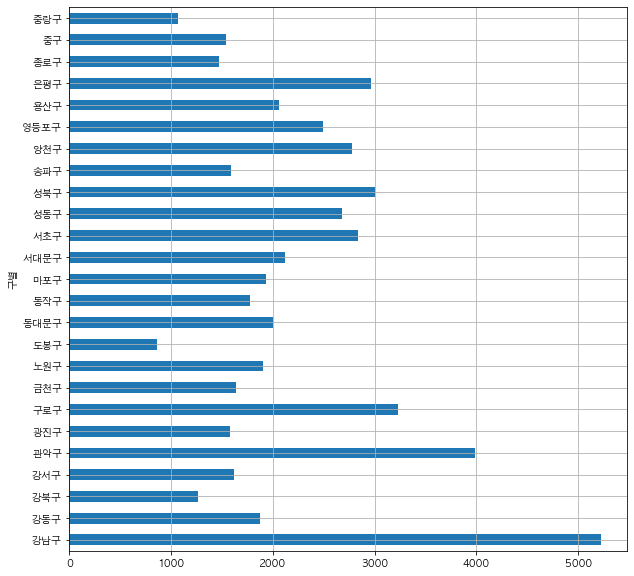

In [68]:
# Bar graph -> 막대 그래프
# figsize 크기비율
data_result['소계'].plot(kind='barh', grid =True, figsize = (10,10) )
plt.show()


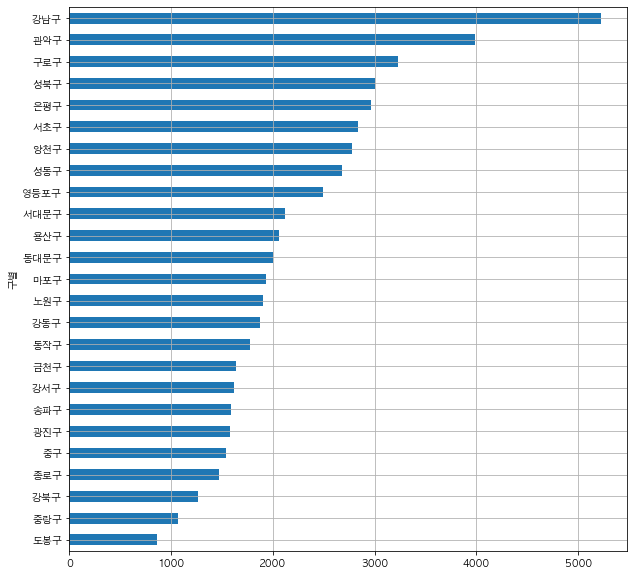

In [71]:
# 이제 정렬만 하면 된다!
# kind = bar <- vertical 
# kind = barg <- horizon
data_result['소계'].sort_values().plot(kind='barh', grid =True, figsize = (10,10) )
plt.show()

## 인구대비 CCTV 비율 

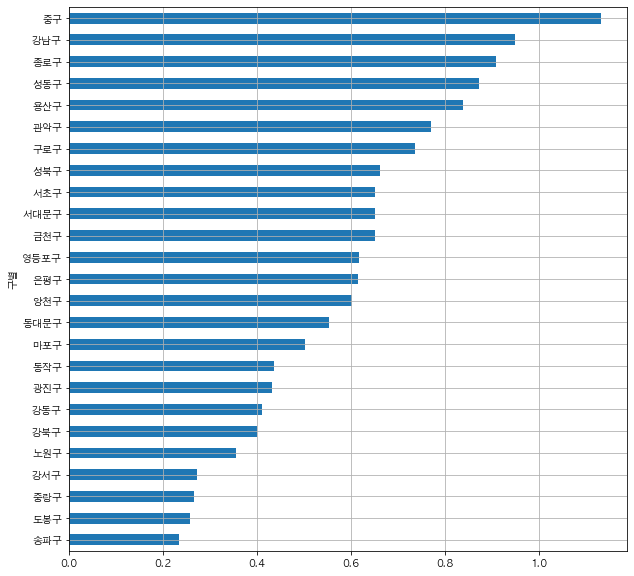

In [75]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind = 'barh', grid =True , figsize = (10,10))
plt.show()


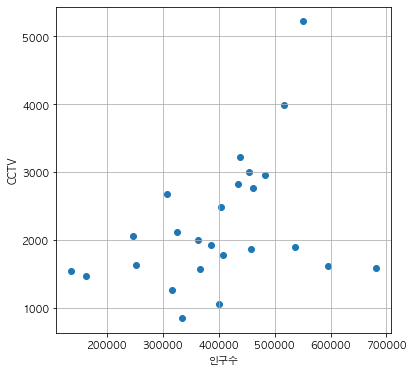

In [76]:
# 산점도를 이용한 시각화

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [78]:
# 인구수, 소계에 따른 기준선(회귀선, 중심선) 만들기
# 선만드는건 평균값을 구하는 것이다. 
# 1,2 case를 말하는 것이다.
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.88522756e-03, 1.06403852e+03])

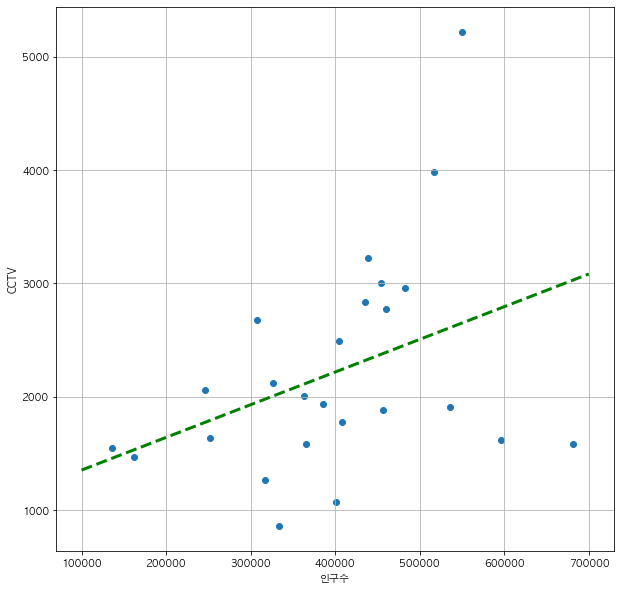

In [80]:
# y축 데이터 만들기 : CCTV소계
# poly1d 그림그려주는 것.
f1 = np.poly1d(fp1)

# x축 만들기
fx = np.linspace(100000, 700000)

plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'])
# color = green
# 선은 평균값이다.
# 선 위는 평균보다 높은 값, 선 밑은 평균보다 밑의 값.
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color ='g') # 기준선 그리기
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

### 직선과의 오차를 구하는 공식과 오차가 큰 순으로 데이터 정렬후 그래프 그리기

In [82]:
# 기준선 구하기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

# y축 데이터 만들기 : CCTV소계
# poly1d 그림그려주는 것.
f1 = np.poly1d(fp1)

# x축 만들기
fx = np.linspace(100000, 700000)

# 소계에서 기준인구수 차이로 오차값 구하기
# np.abs => 절대값구하는 것
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

# 정렬 
df_sort = data_result.sort_values(by = '오차', ascending = False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.949449,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,0.232933,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.771297,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,0.257275,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.271444,1165.777237


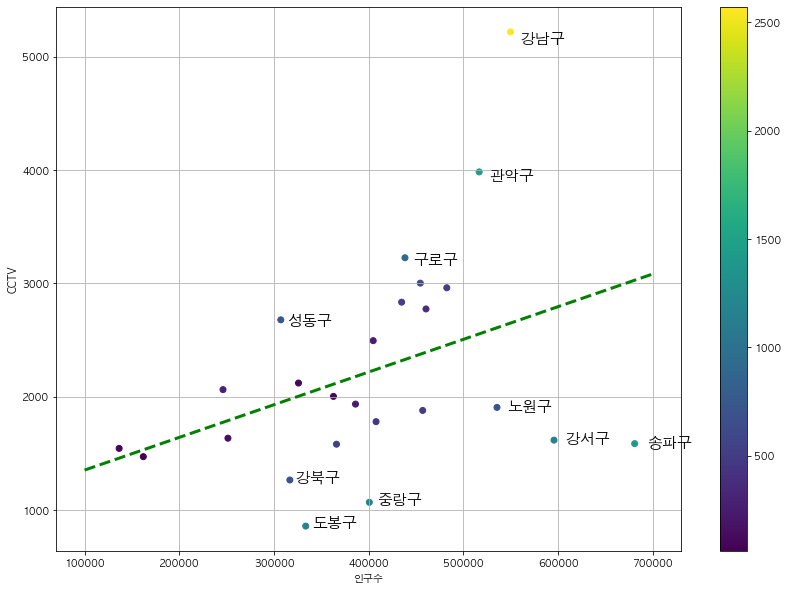

In [86]:
# Graph에 텍스트와 color집어 넣기
plt.figure(figsize=(14,10))
# scatter 산포도(x축, y 축)
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'])
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color ='g') # 기준선 그리기

# 어느 구에서 나온 데이터인지 구분하기위해
# 오차가 가장 큰 10개 구에 텍스트 붙이기
for n in range(10):
    # * 1.02이것은 포인트 보다 오른쪽으로 가기 위해
    #글자를 쓴다(정렬한 부분[가로 data]* 1.02,) 
    plt.text(df_sort['인구수'][n] * 1.02, df_sort['소계'][n] * 0.98,
            df_sort.index[n], fontsize = 15
            ) 

plt.colorbar()
# 노란색일 수록 오차범위 큰거 보라색일 수록 오차범위 작은것. 
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()